# a8a

In [1]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/Course Project/Code')
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_classification import GPC

from sklearn.cluster import KMeans

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
%matplotlib inline
%load_ext autoreload
%autoreload 2


## Данные

In [2]:
x_tr, y_tr = load_svmlight_file('../../../../Programming/DataSets/Classification/a8a(22606,123).txt')
x_tr, y_tr = shuffle(x_tr, y_tr, random_state=241)
data_name = 'a8a'
file_name = data_name

x_tr = x_tr.toarray()
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr).T

x_tr = (x_tr + 1) / 2
y_tr = y_tr.reshape((y_tr.size, 1))
x_test = x_tr[:, int(x_tr.shape[1] * 0.8):]
y_test = y_tr[int(x_tr.shape[1] * 0.8):, :]
y_tr = y_tr[:int(x_tr.shape[1] * 0.8), :]
x_tr = x_tr[:, : int(x_tr.shape[1] * 0.8)]
dim, num = x_tr.shape
print(num, dim)
print(data_name)

18156 123
a8a


## K-Means cluster centers

In [3]:
ind_num = 800
print('Finding means...')
means = KMeans(n_clusters=ind_num, n_init=3, max_iter=100, random_state=241)
means.fit(x_tr.T)
inputs = means.cluster_centers_.T
print('...found')

Finding means...
...found


In [4]:
with open('../plots/vi_vs_svi_class/'+ data_name +'_title.txt', 'w') as f:
    title = data_name + ' dataset, ' + 'n = ' + str(num) + ', d = ' + str(dim) + ', m = ' + str(ind_num)
    f.write(title)

In [5]:
cov_params = np.array([3., 2. , .01])

## svi-L-BFGS-B-c method

In [6]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
svi_gp = GPC(model_covariance_obj, method='svi')

In [7]:
opts = {'mode': 'full', 'maxiter': 50, 'mydisp': True}
svi_res = svi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Hyper-parameters at iteration 0 : [ 3.    2.    0.01  0.    0.  ]
Hyper-parameters at iteration 1 : [  2.99705128e+00   2.98422067e+00   1.00000000e-02  -1.68270069e-03
  -7.86975085e-03]
Hyper-parameters at iteration 2 : [ 2.78325379  3.6059069   0.04349921 -0.00428656 -0.01897555]
Hyper-parameters at iteration 3 : [ 2.20355619  4.06409928  0.52037085 -0.00834689 -0.0358068 ]
Hyper-parameters at iteration 4 : [ 1.73335657  4.6068364   0.86573851 -0.01257347 -0.05222703]
Hyper-parameters at iteration 5 : [ 1.36179725  4.51700936  0.74210106 -0.01470447 -0.0583591 ]
Hyper-parameters at iteration 6 : [ 0.9135236   4.27052882  0.49932677 -0.02161689 -0.07760084]
Hyper-parameters at iteration 7 : [ 0.69063556  4.29709275  0.49721021 -0.02401519 -0.08495785]
Hyper-parameters at iteration 8 : [ 0.49835457  4.36188093  0.53147822 -0.02668605 -0.09229525]
Hyper-parameters at iteration 9 : [ 0.25852888  4.41467851  0.54717517 -0.03234009 -0.10664471]
Hyper-parameters at iteration 10 : [ 0.14160

In [8]:
metric = lambda w: svi_gp.get_prediction_quality(w, x_test, y_test)
svi_x_lst, svi_y_lst = svi_res.plot_performance(metric, 't', freq=1)

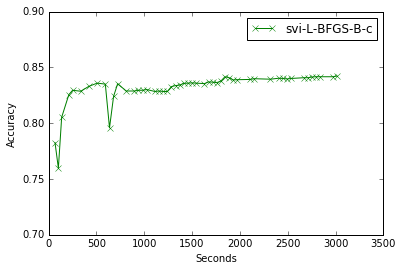

In [14]:
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## vi-means-c method


In [18]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'maxfun':5, 'mydisp': True, 'num_updates':3}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=5)

Hyper-parameters at iteration 0 : [ 3.    2.    0.01]
Hyper-parameters at iteration 1 : [  1.96869180e+00   3.46229293e+02   1.00000000e-02]
Hyper-parameters at iteration 2 : [  1.61095798e+01   3.57749790e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 0 : [  2.49891640e+01   3.64348313e+02   1.00000000e-02]
Hyper-parameters at iteration 0 : [  2.49891640e+01   3.64348313e+02   1.00000000e-02]
Hyper-parameters at iteration 1 : [  2.52153100e+01   3.64179064e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 1 : [  2.52156004e+01   3.64178846e+02   1.00000000e-02]
Hyper-parameters at iteration 0 : [  2.52156004e+01   3.64178846e+02   1.00000000e-02]
Hyper-parameters at iteration 1 : [  2.90859512e+01   3.45333068e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 2 : [  2.90859512e+01   3.45333068e+02   1.00000000e-02]
Hyper-parameters at iteration 0 : [  2.90859512e+01   3.45333068e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 3 : [  2.81080

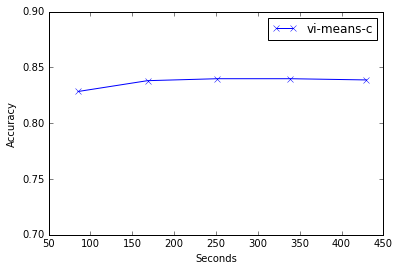

In [19]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_x_lst, vi_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### Taylor
Подбор числа пересчетов

In [23]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')
opts = {'bound': 'Taylor', 'maxfun':5, 'mydisp': True, 'num_updates':3}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=10)

Hyper-parameters at iteration 0 : [ 3.    2.    0.01]
Hyper-parameters at iteration 1 : [  1.00000000e-02   1.00000000e+03   1.00000000e-02]
Hyper-parameters at iteration 2 : [  1.31746746e+01   1.00000000e+03   1.00000000e-02]
Hyper-parameters at iteration 3 : [  1.31910533e+01   9.99778425e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 0 : [  1.31924897e+01   9.99767976e+02   1.00000000e-02]
Hyper-parameters at iteration 0 : [  1.31924897e+01   9.99767976e+02   1.00000000e-02]
Hyper-parameters at iteration 1 : [  1.61060717e+01   9.99709877e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 1 : [  1.67814018e+01   9.99673399e+02   1.00000000e-02]
Hyper-parameters at iteration 0 : [  1.67814018e+01   9.99673399e+02   1.00000000e-02]
Hyper-parameters at iteration 1 : [  1.69137237e+01   9.99670449e+02   1.00000000e-02]
	Hyper-parameters at outter iteration 2 : [  1.72661038e+01   9.99636309e+02   1.00000000e-02]
Hyper-parameters at iteration 0 : [  1.72661038e+01 

LinAlgError: Matrix is not positive definite

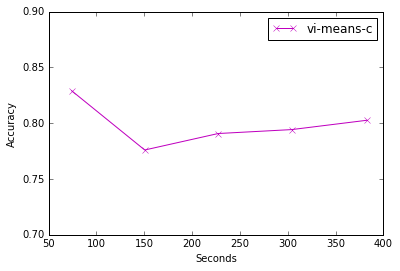

In [21]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_t_x_lst, vi_t_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_t_x_lst[1:], vi_t_y_lst[1:], '-mx', label='vi-means-c')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### JJ-full

In [12]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi_full')
opts = {'maxiter':10, 'mydisp': True}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Hyper-parameters at iteration 0 : [ 3.    2.    0.01  1.    1.  ]
Hyper-parameters at iteration 1 : [ 2.99700449  2.99983812  0.01        1.00013863  1.00008601]
Hyper-parameters at iteration 2 : [ 3.06304734  4.32044119  0.01        1.00034376  1.00020574]
Hyper-parameters at iteration 3 : [ 3.00253224  5.08715746  0.01        1.00050887  1.00029142]
Hyper-parameters at iteration 4 : [ 2.70069273  5.96151341  0.01        1.0007851   1.0004298 ]
Hyper-parameters at iteration 5 : [ 2.03961093  6.58765676  0.01        1.00114598  1.00061762]
Hyper-parameters at iteration 6 : [ 0.97860031  6.80557252  0.01        1.00162762  1.00087847]
Hyper-parameters at iteration 7 : [ 1.03137824  7.4157309   0.01        1.00290841  1.00150306]
Hyper-parameters at iteration 8 : [ 1.29004262  9.03337841  0.01        1.00778776  1.00359167]
Hyper-parameters at iteration 9 : [  1.36958919e+00   1.04206118e+01   1.00000000e-02   1.01504176e+00
   1.00634738e+00]
Hyper-parameters at iteration 10 : [  1.5575

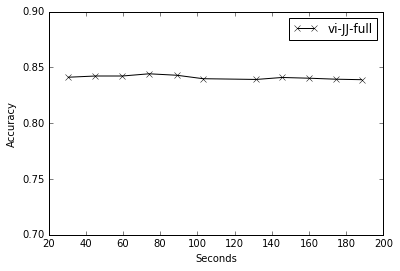

In [15]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_tr, y_tr, x_test, y_test)
vi_full_x_lst, vi_full_y_lst = vi_res.plot_performance(metric, 't', freq=1)
plt.plot(vi_full_x_lst[1:], vi_full_y_lst[1:], '-kx', label='vi-JJ-full')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([.7, .9])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## svi-AdaDelta-c
Подберем шаг для метода

In [25]:
results = []
steps = [1., 0.5, 0.1]
for step in steps:
    print(step)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)

    opts = {'mode': 'adadelta', 'maxiter': 5, 'verbose': True, 'batch_size': 200, 
            'step_rate': step}#, 'print_freq':50}
    batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)
    results.append(batch_res)

1.0
Using AdaDelta optimizer
Iteration  0 :
	Gradient norm 21.4385852605
Iteration  1 :
	Gradient norm 23.5209739946
Iteration  2 :
	Gradient norm 4.43004268898
Iteration  3 :
	Gradient norm 11.9079159693
Iteration  4 :
	Gradient norm 17.2474819173
0.5
Using AdaDelta optimizer
Iteration  0 :
	Gradient norm 45.4483579813
Iteration  1 :
	Gradient norm 31.9389963731
Iteration  2 :
	Gradient norm 16.9789839387
Iteration  3 :
	Gradient norm 8.77759981868


KeyboardInterrupt: 

0
1
2


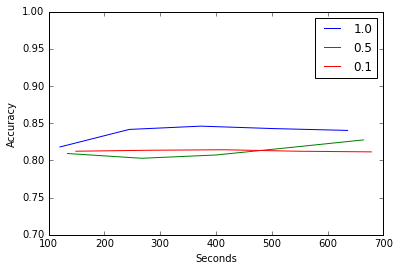

In [46]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(results)):
    svi_ad_x_lst, svi_ad_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], label=steps[i])
    print(i)
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

In [ ]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)
opts = {'mode': 'adadelta', 'maxiter': 5, 'verbose': True, 'batch_size': 200, 
        'step_rate': 1., 'print_freq':1}
batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

In [ ]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
svi_ad_x_lst, svi_ad_y_lst = batch_res.plot_performance(metric, 't', freq=1)
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## Выводы

In [26]:
svi_ad_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_ad_x.npy')
svi_ad_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_ad_y.npy')

In [ ]:
# svi_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_svi_x.npy')
# svi_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_svi_y.npy')
# vi_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_x.npy')
# vi_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_y.npy')
# vi_t_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_x.npy')
# vi_t_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_y.npy')
# svi_ad_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_ad_x.npy')
# svi_ad_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_ad_y.npy')
# vi_full_x_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_x.npy')
# vi_full_y_lst = np.load('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_y.npy')

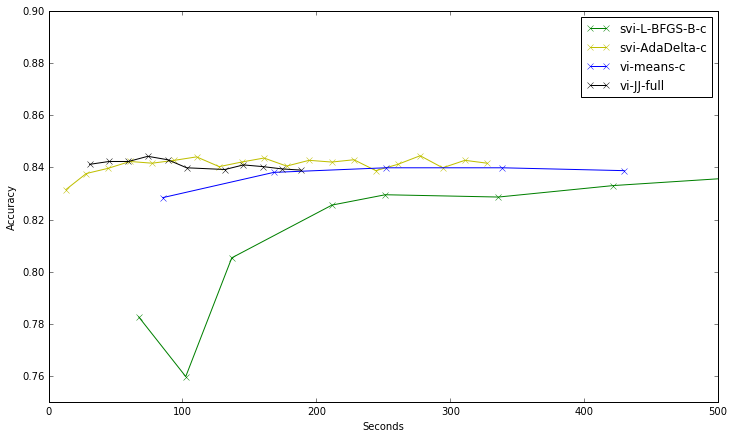

In [30]:
plt.figure(figsize=(12, 7))
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
plt.plot(vi_full_x_lst[1:], vi_full_y_lst[1:], '-kx', label='vi-JJ-full')
plt.ylim([0.75, .9])
plt.xlim([0., 500.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

In [24]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_x.npy', vi_t_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_t_y.npy', vi_t_y_lst)

In [35]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_x.npy', svi_ad_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_y.npy', svi_ad_y_lst)

In [14]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_st_x.npy', vi_st_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_st_y.npy', vi_st_y_lst)

In [10]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_x.npy', svi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_y.npy', svi_y_lst)

In [ ]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_x.npy', vi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_y.npy', vi_y_lst)

In [17]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_x.npy', vi_full_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_f_y.npy', vi_full_y_lst)